In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2024-01-01'
end = '2024-12-30'

# Tickers of assets
assets = [
    'SPY',  # 미국 주식
    'IEV',  # 유럽 주식 
    'EWJ',  # 일본 주식
    'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
    'IYR',  # 미국 리츠
    'RWX',  # 글로벌 리츠
    'GLD',  # 금
    'DBC'  # 상품
]
# assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
#           'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
#           'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
display(data.head())
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  10 of 10 completed


Price       Adj Close                                                          \
Ticker            DBC        EEM        EWJ         GLD        IEF        IEV   
Date                                                                            
2024-01-02 2186.0001% 3946.7487% 6309.3430% 19072.0001% 9412.6259% 5113.6566%   
2024-01-03 2213.9999% 3924.8997% 6274.5995% 18913.0005% 9435.1723% 5072.5597%   
2024-01-04 2202.0000% 3911.9888% 6259.7099% 18932.0007% 9378.3211% 5098.9796%   
2024-01-05 2212.9999% 3916.9544% 6306.3644% 18935.0006% 9344.0155% 5093.1084%   
2024-01-08 2180.9999% 3927.8790% 6398.6820% 18786.9995% 9375.3815% 5147.9046%   

Price                                                    ...   Volume  \
Ticker            IYR        RWX         SPY        TLT  ...      DBC   
Date                                                     ...            
2024-01-02 9129.1229% 2634.8877% 46967.0807% 9606.8489%  ...  2421600   
2024-01-03 8911.3380% 2604.5231% 46583.5144% 9646.9147%  ...   857700   
2024-01-04 8895.5002% 2586.8917% 46433.4656% 9500.3342%  ...   734000   
2024-01-05 8875.7011% 2606.4819% 46497.0642% 9409.4543%  ...   800800   
2024-01-08 9003.4019% 2625.0927% 47160.8521% 9502.2888%  ...   760800   

Price                                                                      \
Ticker           EEM      EWJ      GLD       IEF     IEV      IYR     RWX   
Date                                                                        
2024-01-02  20839200  6828000  6025600   9444000  433800  4613800  141300   
2024-01-03  32220700  7952800  8661600  11040500  363800  7145500  111500   
2024-01-04  20922700  3649500  4416700   7354800  220500  6303700   35700   
2024-01-05  21875600  6507200  7481200  10001000  286300  6890700  120300   
2024-01-08  16208600  5785500  6215000   7044700  284900  4941900  115300   

Price                            
Ticker            SPY       TLT  
Date                             
2024-01-02  123623700  47797400  
2024-01-03  103585900  58159500  
2024-01-04   84232200  52604500  
2024-01-05   86060800  45883000  
2024-01-08   74879100  39485800  

[5 rows x 60 columns]

In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,DBC,EEM,EWJ,GLD,IEF,IEV,IYR,RWX,SPY,TLT
Date,,,,,,,,,,
2024-01-03,1.2809%,-0.5536%,-0.5507%,-0.8337%,0.2395%,-0.8037%,-2.3856%,-1.1524%,-0.8167%,0.4171%
2024-01-04,-0.5420%,-0.3289%,-0.2373%,0.1005%,-0.6025%,0.5208%,-0.1777%,-0.6770%,-0.3221%,-1.5195%
2024-01-05,0.4995%,0.1269%,0.7453%,0.0158%,-0.3658%,-0.1151%,-0.2226%,0.7573%,0.1370%,-0.9566%
2024-01-08,-1.4460%,0.2789%,1.4639%,-0.7816%,0.3357%,1.0759%,1.4388%,0.7140%,1.4276%,0.9866%
2024-01-09,0.7336%,-1.4159%,-0.6050%,0.0319%,-0.0418%,-1.0454%,-0.6927%,-0.8582%,-0.1517%,-0.6376%


In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # 과거 데이터를 기반으로 기대 수익률을 추정하는 방법을 선택
method_cov='hist' # 과거 데이터를 기반으로 공분산 행렬을 추정하는 방법을 선택

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # 고전적인 방법(과거 데이터 기반)을 사용하여 최적화 모델을 설정합니다. 다른 옵션으로는 Black-Litterman 모델(BL)과 요인 모델(FM)이 있습니다.
rm = 'MV' # 리스크 측정 방법으로 분산(Variance)을 사용
obj = 'Sharpe' # 샤프 비율을 최대화하는 것을 목표로 최적화를 수행합니다. 다른 목표 함수로는 최소 리스크(MinRisk), 최대 수익(MaxRet), 효용(Utility)이 있습니다.
hist = True # 역사적 시나리오를 사용하여 리스크 측정 값을 계산
rf = 0 # 무위험 이자율을 0으로 설정
l = 0 # 위험 회피 계수를 0으로 설정합니다. 이는 obj가 'Utility'일 때만 유용합니다.

# 지정된 모델과 목표 함수에 따라 최적의 자산 배분 가중치 w를 계산합니다.
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)

,DBC,EEM,EWJ,GLD,IEF,IEV,IYR,RWX,SPY,TLT
weights,0.0000%,0.0000%,0.0000%,38.5555%,14.6748%,0.0000%,0.0000%,0.0000%,46.7697%,0.0000%


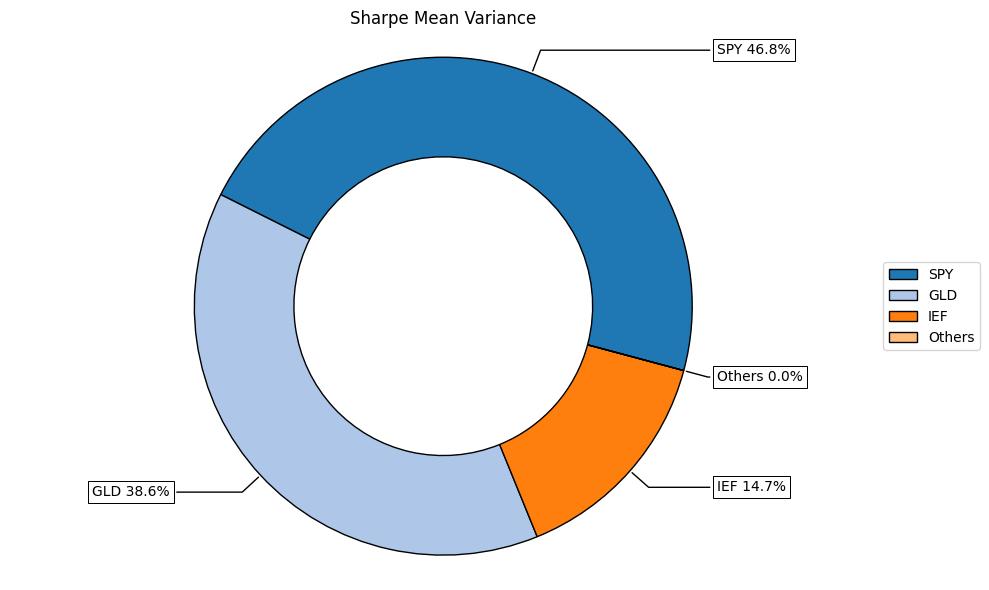

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,DBC,EEM,EWJ,GLD,IEF,IEV,IYR,RWX,SPY,TLT
0,24.3172%,0.0000%,0.0000%,0.0000%,63.7881%,0.0000%,0.0000%,0.0000%,11.8947%,0.0000%
1,17.8331%,0.0000%,0.0000%,4.2518%,57.7198%,0.0000%,0.0000%,0.0000%,20.1954%,0.0000%
2,14.7293%,0.0000%,0.0000%,7.6549%,54.6792%,0.0000%,0.0000%,0.0000%,22.9366%,0.0000%
3,12.2208%,0.0000%,0.0000%,10.4039%,52.2279%,0.0000%,0.0000%,0.0000%,25.1473%,0.0000%
4,10.0370%,0.0000%,0.0000%,12.8032%,50.0846%,0.0000%,0.0000%,0.0000%,27.0752%,0.0000%


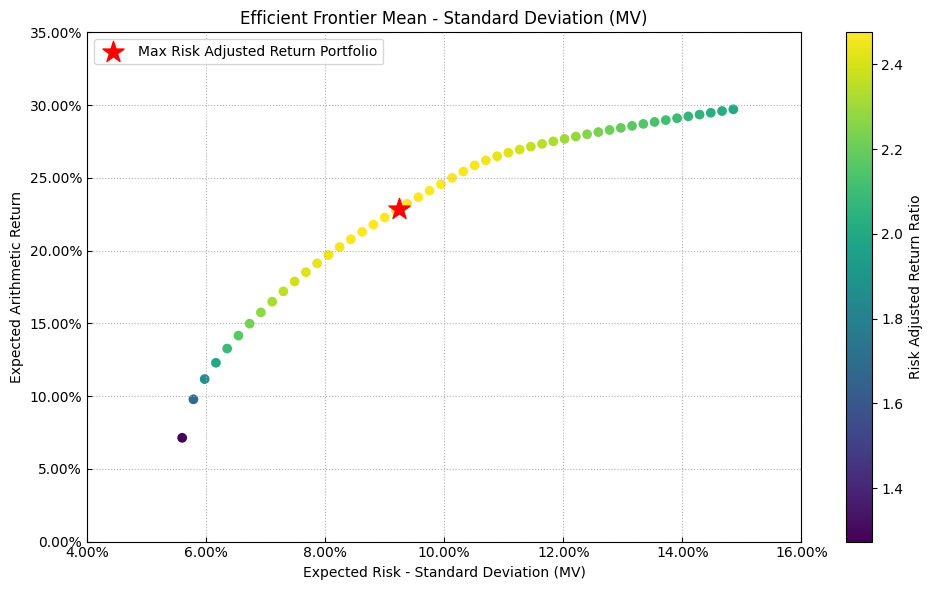

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

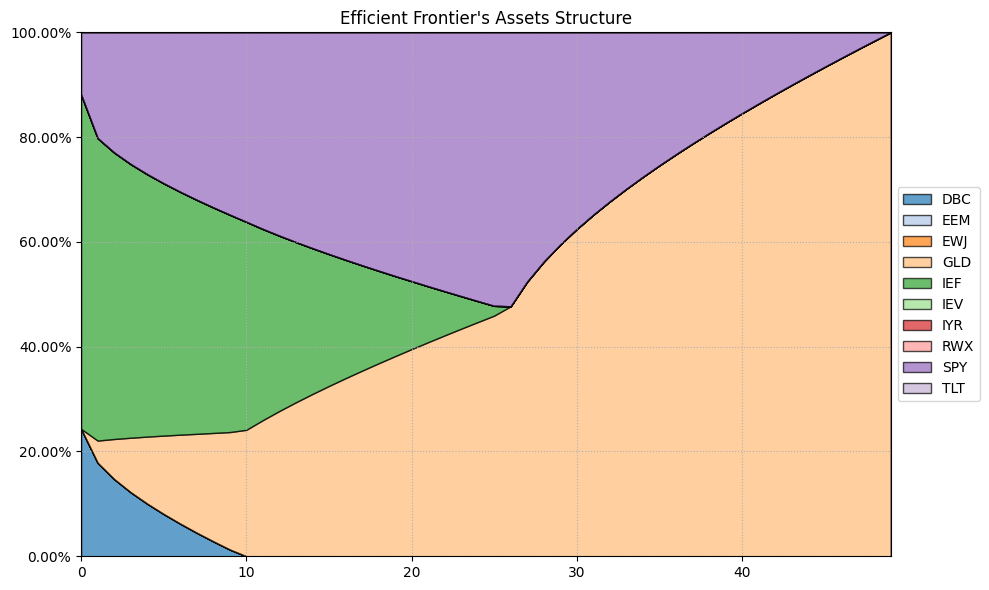

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [8]:
rm = 'CVaR' # Risk measure 조건부 가치-at-리스크(CVaR, Conditional Value at Risk)

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,DBC,EEM,EWJ,GLD,IEF,IEV,IYR,RWX,SPY,TLT
weights,0.0000%,0.0000%,0.0000%,33.3677%,8.5903%,0.0000%,0.0000%,0.0000%,58.0420%,0.0000%


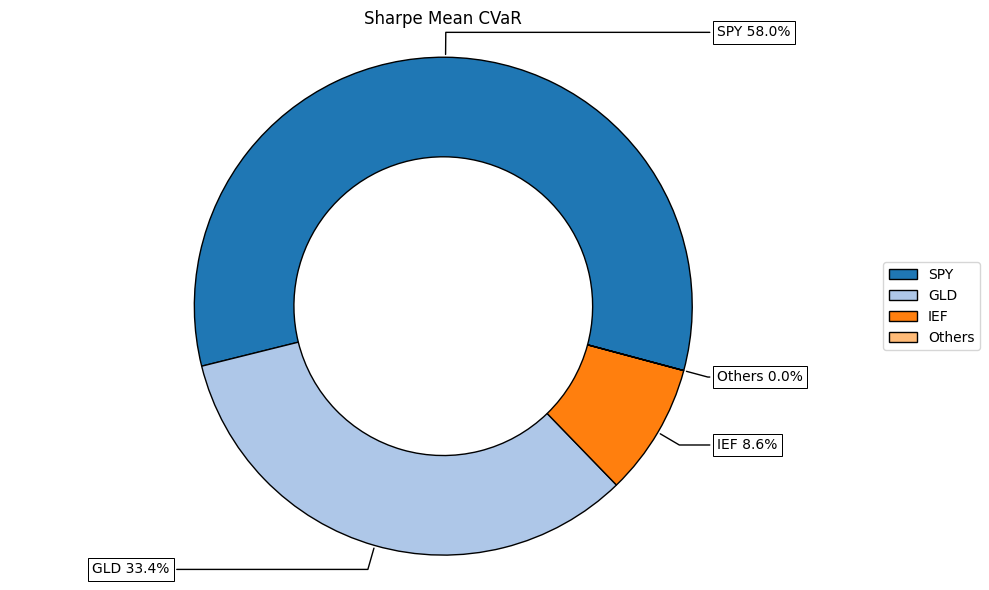

In [9]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [10]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
DBC,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
EEM,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
EWJ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
GLD,38.56%,40.33%,32.85%,36.47%,32.03%,33.37%,40.59%,48.15%,52.33%,29.47%,40.76%,39.47%,46.92%
IEF,14.67%,13.78%,20.36%,18.46%,21.00%,8.59%,0.00%,0.00%,39.67%,9.79%,33.67%,19.96%,36.56%
IEV,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IYR,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
RWX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SPY,46.77%,45.90%,46.79%,45.07%,46.98%,58.04%,59.41%,51.85%,8.00%,60.74%,25.56%,40.57%,16.52%
TLT,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
